# Time Series Analysis

Time series analysis is a statistical technique used to analyze and interpret data points collected over time. It involves studying the patterns, trends, and other characteristics of time-series data to make informed predictions or draw meaningful insights.

In time series analysis, the data points are typically collected a fixed intervals (e.g., daily, weekly, monthly, quarterly) and are arranged in chronological order. Common examples of time series data include stock prices, weather patterns, economic indicators, and sales figures.

In the field of business analytics, time series analysis is used in various applications such as sales forecasting, inventory management, financial analysis, and demand forecasting.

Forecast Future Trends: Time series analysis helps in predicting future trends based on historical data, which is valuable for making strategic business decision makings. 

Identify Patterns and Anomalies: It helps in identifying patterns, trends, and anomalies in data, which can provide valuable insights into business operations.

Optimize Resource Allocation: By analyzing time series data, businesses can optimize resource allocation, improve efficiency, and reduce costs.

Improve Decision Making: Time series analysis provides data-driven insights that can improve decision-making processes in areas such as marketing, operations, and 5. finance.

Risk Management: It helps in identifying and mitigating risks by analyzing historical data and predicting potential future risks.

Overall, knowledge of time series analysis is highly beneficial for business analytics students as it equips them with the skills needed to analyze and interpret time-based data, which is critical in business operations. 

**Interesting Fact:** Text data is not typically considered time series data. Time series data consists of observations or measurements taken at successive points in time, whereas text data consists of unstructured textual information that does not inherently have a time component. However, text data can be analyzed in conjunction with time series data in certain contexts. For example, if text data is associated with timestamps indicating when the text was generated (e.g., social media posts, news articles), it can be treated as time-stamped data and analyzed using time series analysis techniques for forecasting future values based on past observations. They are especially useful for capturing and predicting trends and patterns in the data.

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

sns.set()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

### Random Walk

In the context of time series analysis, a random walk refers to a **stochastic process** where the next value in a sequence is determined by adding a random shock or error term to the previous value. When using a random walk model, the key assumption is that the variable being modeled is **not predictable** and follows a random process. 

The random walk can be formulated as:
$$ X_{t} = X_{t-1} + \epsilon_{t} $$ 

Where,

$X_{t-1}$ is the value of previous time stemp at $t-1$, <br>
$X_{t}$ is the estimated value of at $t$, <br>
$\epsilon_{t}$ is the random or error term at time $t$.

Usually, when consider using RW, people will have an initial assumption towards the random term $\epsilon_{t}$. The common assumption is that $\epsilon_{t}$ follows a normal distribution. 

The Random Walk model is usually used as baseline mordel in many applications. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical stock data (e.g., Apple)
stock_data = yf.download('AAPL', start='2023-05-01', end='2023-06-30')
close_prices = stock_data['Close']

# Get the last price as the starting point
start_price = close_prices.iloc[-1]

# Number of days to predict
num_days = 7

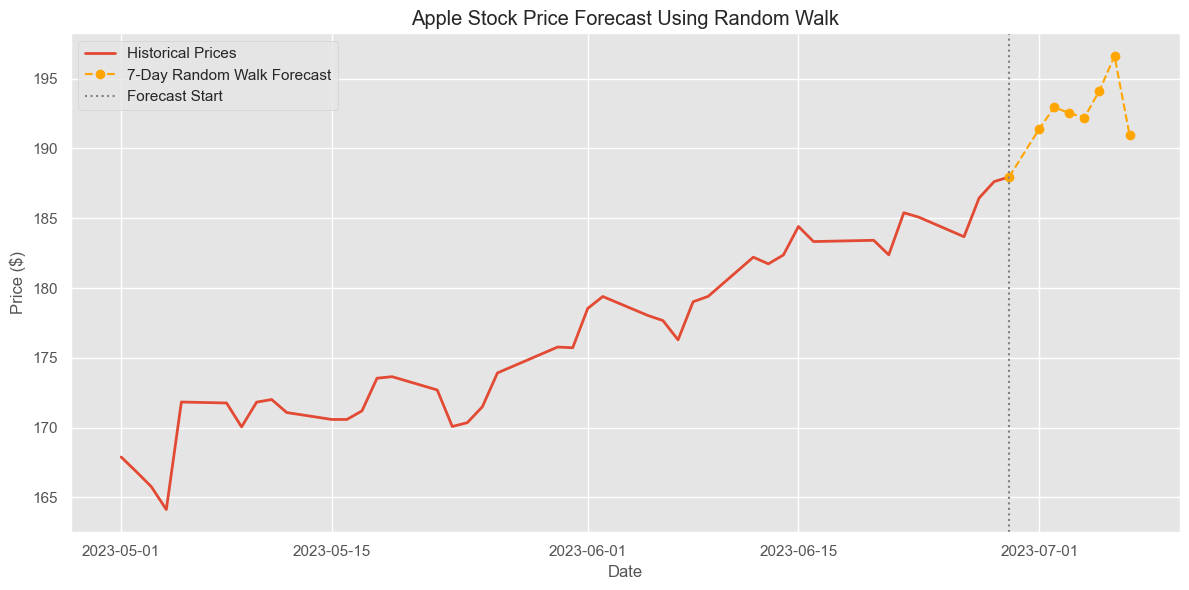

In [9]:
# Set random seed for reproducibility
np.random.seed(2024)

# Estimate volatility from historical daily returns
daily_returns = close_prices.pct_change().dropna()
volatility = daily_returns.std()

# Generate random walk steps using normal distribution assumption
random_steps = np.random.normal(0, volatility, num_days)

# Simulate future prices
simulated_prices = [start_price]
for step in random_steps:
    next_price = simulated_prices[-1] * (1 + step)
    simulated_prices.append(next_price)

# Combine historical and future prices for plotting
full_dates = close_prices.index.append(
    pd.date_range(start=close_prices.index[-1] + pd.Timedelta(days=1), periods=num_days + 1)
)

full_prices = pd.concat([close_prices, pd.Series(simulated_prices[1:], index=full_dates[-num_days:])])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Historical Prices', linewidth=2)
plt.plot(full_prices.index[-(num_days+1):], simulated_prices, label='7-Day Random Walk Forecast', linestyle='--', marker='o', color='orange')
plt.axvline(close_prices.index[-1], color='gray', linestyle=':', label='Forecast Start')
plt.title('Apple Stock Price Forecast Using Random Walk')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In a simple random walk model, we assume that the error terms, $\epsilon_{t}$ are independent and identically distributed (IID) with mean 0 and constant variance $\sigma^2$. This means that the future value of the time series $X_{t}$ is equal to the current value $X_{t-1}$ plus a random shock $\epsilon_{t}$. 

Mathematically, we can express the expected value of the future value $X_{t}$ given the current value $X_{t-1}$ as:

$$ E[X_{t}| X_{t-1}] = X_{t- 1} $$

This means that, on average, the future value of the time series is equal to the current value, indicating that there is no systematic drift or trend in the time series. Each step in the random walk is random and independent of previous steps, leading to unpredictable future values and the characteristic "random" behavior of the time series.

### Autocorrelation Plots
Autocorrelation plots, also known as ACF (autocorrelation function) plots, are used to visualize the autocorrelation of a time series. Autocorrelation measures the relationship between a time series and a lagged version of itself. This can help in identifying patterns such as seasonality and trends in the data. A high autocorrelation at a specific lag indicates a strong relationship between the time series and its lagged version at that lag.

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.An autocorrelation plot shows the value of the autocorrelation function (acf) on the vertical axis. It can range from –1 to 1. 
We can calculate the correlation for time series observations with observations with previous time steps, called lags. The horizontal axis of an autocorrelation plot shows the size of the lag between the elements of the time series. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation. 

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Reference: https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm

(array([ 1.        ,  0.45201418,  0.25400967,  0.06285789, -0.35460603,
        -0.36668503, -0.26250421, -0.28508646]),
 [Ticker
  AAPL    187.956741
  Name: 2023-06-29 00:00:00, dtype: float64,
  Ticker
  AAPL    188.982311
  Name: 2023-06-29 00:00:00, dtype: float64,
  Ticker
  AAPL    188.695278
  Name: 2023-06-29 00:00:00, dtype: float64,
  Ticker
  AAPL    190.03782
  Name: 2023-06-29 00:00:00, dtype: float64,
  Ticker
  AAPL    193.217249
  Name: 2023-06-29 00:00:00, dtype: float64,
  Ticker
  AAPL    192.72026
  Name: 2023-06-29 00:00:00, dtype: float64,
  Ticker
  AAPL    192.224584
  Name: 2023-06-29 00:00:00, dtype: float64,
  Ticker
  AAPL    195.559234
  Name: 2023-06-29 00:00:00, dtype: float64])

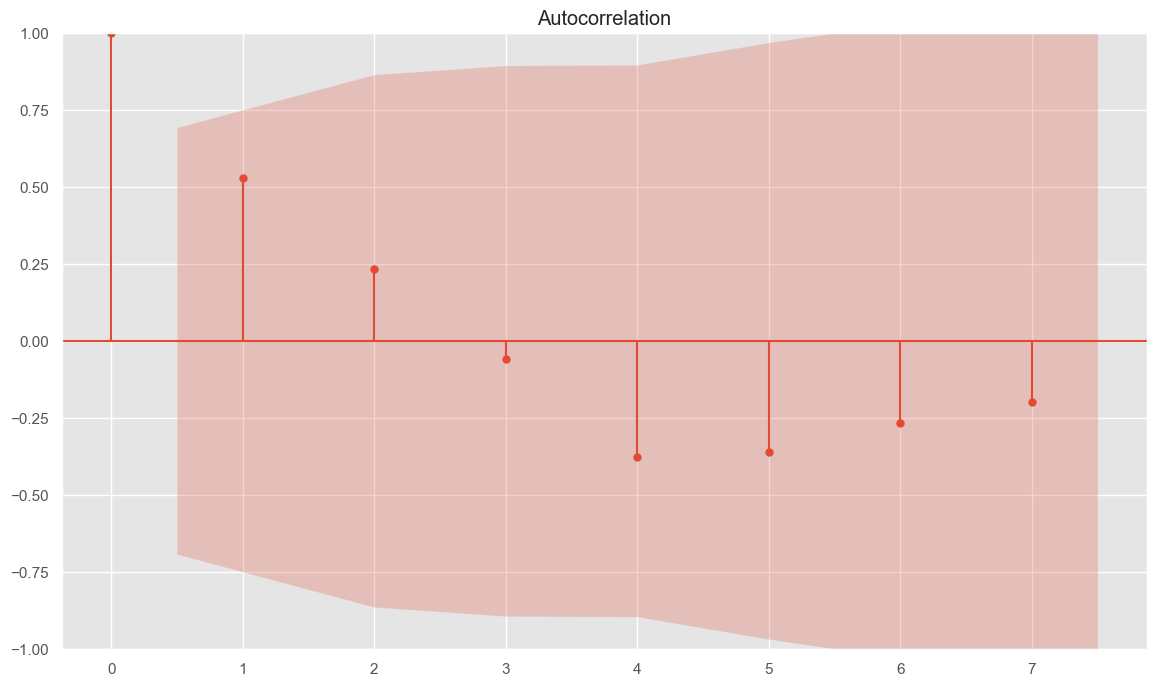

In [7]:
random_walk_acf = acf(simulated_prices, nlags = num_days)
acf_plot = plot_acf(random_walk_acf)
random_walk_acf, simulated_prices

**Looking at the corelation plot we can say that the process is not stationary.** We will try something different method.

### Moving Average (MA Models)

A moving average is a commonly used technique in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles in the data. It calculates the average of a specified number of consecutive data points (or "window") and replaces the original value with this average. This helps in reducing noise and making patterns more visible.

In MA models, we start wit hthe averae muu, to get the value at time t, we add a linear combination of residuals from previous time stamps. In finance, residual refers to new unpredictable information that can't be captured by past data points. The residuals are difference between model's past prediction and actual values.

There are mainly two type of Moving Average Models, SMA and EMA. 

##### Simple Moving Average
$$  X_{t} = E[X_{t-1} + X_{t-2} + X_{t-3} + ... + X_{t-p}]$$

Where,
1. $X_{t}$ is the estimated value.
2. $X_{t-1}, X_{t-2}, X_{t-3}, ... , X_{t-p}$ are the values in the window period.
3. $p$ is the window period that SMA looks into the history.

The Simple Moving Average is calculated by taking the average of a set of values over a specified period.

##### Exponential Moving Average

$$ EMA_{t} = \alpha X_{t} + (1-\alpha) EMA_{t-1} $$

Where,
1. $EMA_{t}$ is the expopnential moving average at time t.
2. $X_{t}$ is the value of the time series at time t.
3. $\alpha$ is the smoothing factor, which determines the weight given to the most recent value. It is calculated as $\alpha = \frac{2}{N+1}$, where $N$ is the number of periods. 

The EMA gives more weights to recent data points, making it more responsive to recent changes in the data compared to the SMA. One interesting fact about EMA is that it is calculated recursively, with each value depending on the previous EMA value and the current value of the time series. The smoothing factor $\alpha$ determines how much weight is given to the most recent value compared to the previous EMA values. 

In [4]:
# SMA and EMA calculation for one day. 

# Calculate Simple Moving Average (SMA)
sma = apple_hist['Close'].rolling(window = num_days).mean()

# Calculate Exponential Moving Average (EMA)
ema_adj = apple_hist['Close'].ewm(span = num_days, adjust = True).mean()

# Calculate Exponential Moving Average (EMA)
ema = apple_hist['Close'].ewm(span = num_days, adjust = False).mean()

sma, ema_adj, ema

(Date
 2023-01-04           NaN
 2023-01-05           NaN
 2023-01-06           NaN
 2023-01-09           NaN
 2023-01-10           NaN
                  ...    
 2023-05-10    166.255667
 2023-05-11    166.688333
 2023-05-12    167.028667
 2023-05-15    167.267667
 2023-05-16    167.464334
 Name: Close, Length: 92, dtype: float64,
 Date
 2023-01-04    126.360001
 2023-01-05    125.667665
 2023-01-06    127.073881
 2023-01-09    127.921462
 2023-01-10    128.560472
                  ...    
 2023-05-10    165.972945
 2023-05-11    166.476020
 2023-05-12    166.870156
 2023-05-15    167.206408
 2023-05-16    167.520869
 Name: Close, Length: 92, dtype: float64,
 Date
 2023-01-04    126.360001
 2023-01-05    126.273549
 2023-01-06    126.489449
 2023-01-09    126.725613
 2023-01-10    126.983960
                  ...    
 2023-05-10    165.860993
 2023-05-11    166.369961
 2023-05-12    166.769964
 2023-05-15    167.111902
 2023-05-16    167.431780
 Name: Close, Length: 92, dtype: float64

[*********************100%%**********************]  1 of 1 completed


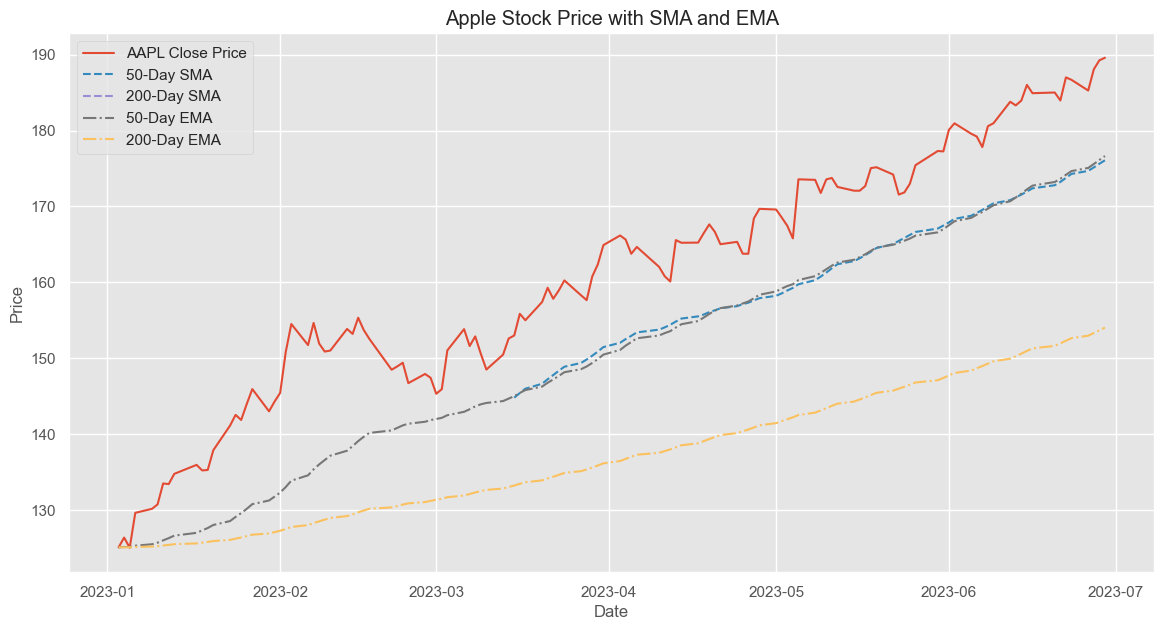

Predicted future price using 50-Day SMA: 176.07860015869142
Predicted future price using 50-Day EMA: 176.64508041218832


In [5]:
# Download Apple stock data
apple_stock = yf.download('AAPL', start='2023-01-01', end='2023-06-30')

# Calculate Simple Moving Average (SMA)
sma_50 = apple_stock['Close'].rolling(window=50).mean()
sma_200 = apple_stock['Close'].rolling(window=200).mean()

# Calculate Exponential Moving Average (EMA)
ema_50 = apple_stock['Close'].ewm(span=50, adjust=False).mean()
ema_200 = apple_stock['Close'].ewm(span=200, adjust=False).mean()

# Plot the stock price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(apple_stock['Close'], label='AAPL Close Price')
plt.plot(sma_50, label='50-Day SMA', linestyle='--')
plt.plot(sma_200, label='200-Day SMA', linestyle='--')
plt.plot(ema_50, label='50-Day EMA', linestyle='-.')
plt.plot(ema_200, label='200-Day EMA', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price with SMA and EMA')
plt.legend()
plt.show()

# Predict future price based on the last SMA and EMA values
last_close_price = apple_stock['Close'].iloc[-1]
predicted_price_sma = sma_50.iloc[-1]  # Using 50-Day SMA as prediction
predicted_price_ema = ema_50.iloc[-1]  # Using 50-Day EMA as prediction

print(f"Predicted future price using 50-Day SMA: {predicted_price_sma}")
print(f"Predicted future price using 50-Day EMA: {predicted_price_ema}")


### Note

While SMA and EMA are useful for understanding trends and patterns in historical stock prices, they are not typically used alone for making precise future predictions. Instead, they are often used as part of a broader analysis that includes other indicators and techniques. 

### Autoregrssion

An autoregression (AR) model is a type of time series model that predicts future values in a time series based on past values. It is a linear model that uses the dependent relationship between an observation and a number of lagged observations (i.e., its own past values).

The general form of an autoregressive model of order $p$, denoted as $AR(p)$, is:

$$ X_{t} = C + \phi_{1} X_{t-1} + \phi_{2} X_{t-2} + \phi_{3} X_{t-3} + ... + \phi_{p} X_{t-p} + \epsilon_{t} $$

Where:
1. $X_t$ is the value of the time series at time t(the value to estimate)
2. $ C $ is a constant value(intercept term for a linear function)
3. $\phi{1}, \phi_{2}, ..., \phi_{p}$ are the parameters of the model that represent the relationship between the current value of the series and its past values. These are known as the autoregressive parameters.
4. $X_{t-1}, X_{t-2}, ..., X_{t-p}$ are the lagged values of the time series.
5. $\epsilon$ is white noise or error term at time t, which represents random fluctuations in the data that are not accounted for by the model.
   
The $AR(p)$ model assumes that the current value of the time series is a linear combination of its past values, with the coefficients $\phi_{1}, \phi_{2}, ..., \phi_{p}$ 
determining the strength of the relationship between each lagged value and the current value. The order p specifies how many past values are included in the model.

Autoregressive models are commonly used in time series analysis for forecasting future values based on past observations. They are especially useful for capturing and predicting trends and patterns in the data.

[*********************100%%**********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 10.227715319067581


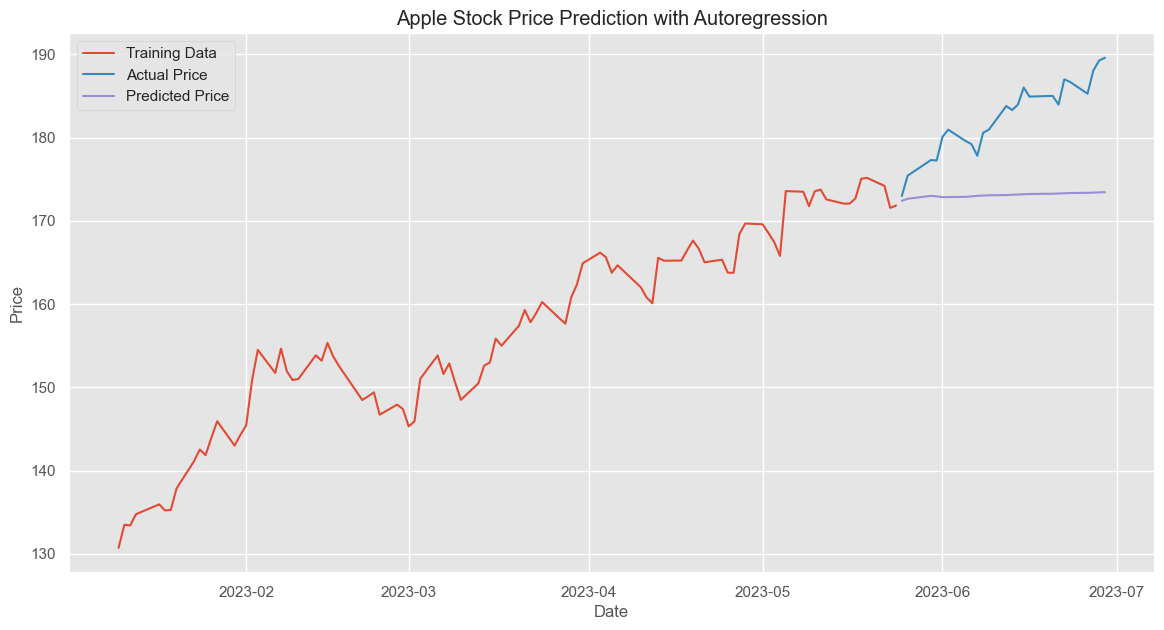

In [6]:
# Download Apple stock data
apple_stock = yf.download('AAPL', start='2023-01-01', end='2023-06-30')

# Create a lagged version of the stock price
lags = 5  # Number of lagged values to use
for i in range(1, lags+1):
    apple_stock[f'Lag_{i}'] = apple_stock['Close'].shift(i)

# Drop NaN values
apple_stock.dropna(inplace=True)

# Split the data into training and test sets
train_size = int(len(apple_stock) * 0.8)
train, test = apple_stock[:train_size], apple_stock[train_size:]

# Fit an autoregressive model
model = AutoReg(train['Close'], lags=lags)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# get the correct index for predictions
predictions.index = test.index

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(test['Close'], predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predicted and actual prices
plt.figure(figsize=(14, 7))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price Prediction with Autoregression')
plt.legend()
plt.show()


### We can compare this prediction with the following using RMSE.

### Autoregressive Moving Average

Autoregressive Moving Average(ARMA) models are a class of models that combine autoregressive(AR) and moving average(MA) processes. ARMA models are used to model the dependencies between observations in a time series based on past values. 

An AR model:

$$ X_{t} = C + \phi_{1} X_{t-1} + \phi_{2} X_{t-2} + \phi_{3} X_{t-3} + ... + \phi_{p} X_{t-p} + \epsilon_{t} $$

An ARMA(p, q) model is defined as:

$$ X_{t} = C + \phi_{1} X_{t-1} + \phi_{2} X_{t-2} + \phi_{2} X_{t-2} + ... + \phi_{p} X_{t-p} + \epsilon_{t} - \theta_{1}\epsilon_{t-1} - \theta_{2}\epsilon_{t-2} - ... - \theta_{q}\epsilon_{t-q} $$

Where:
1. $X_t$ is the value of the time series at time t(the value to estimate)
2. $ C $ is a constant value(intercept term for a linear function)
3. $\phi{1}, \phi_{2}, ..., \phi_{p}$ are the autoregressive parameters. 
4. $X_{t-1}, X_{t-2}, ..., X_{t-p}$ are the lagged values of the time series.
5. $\epsilon$ is white noise or error term at time t.
6. $\theta_{1}, \theta_{2}, ..., \theta_{q}$ are the moving average parameters.
7. $p$ is the order of the autoregressive process(AR).
8. $q$ is the order of the moving average process(MA).

ARMA models are typically used when the time series exhibits both autoregressive and moving average propperties. The parameters p and q are determined based on the autocorrelation and partial autocorrelation plots of the time series data. **Key Assumption:** the statistical properties such as mean, variance, and autocorrelation structure do not change over time.

[*********************100%%**********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 11.172396769440425


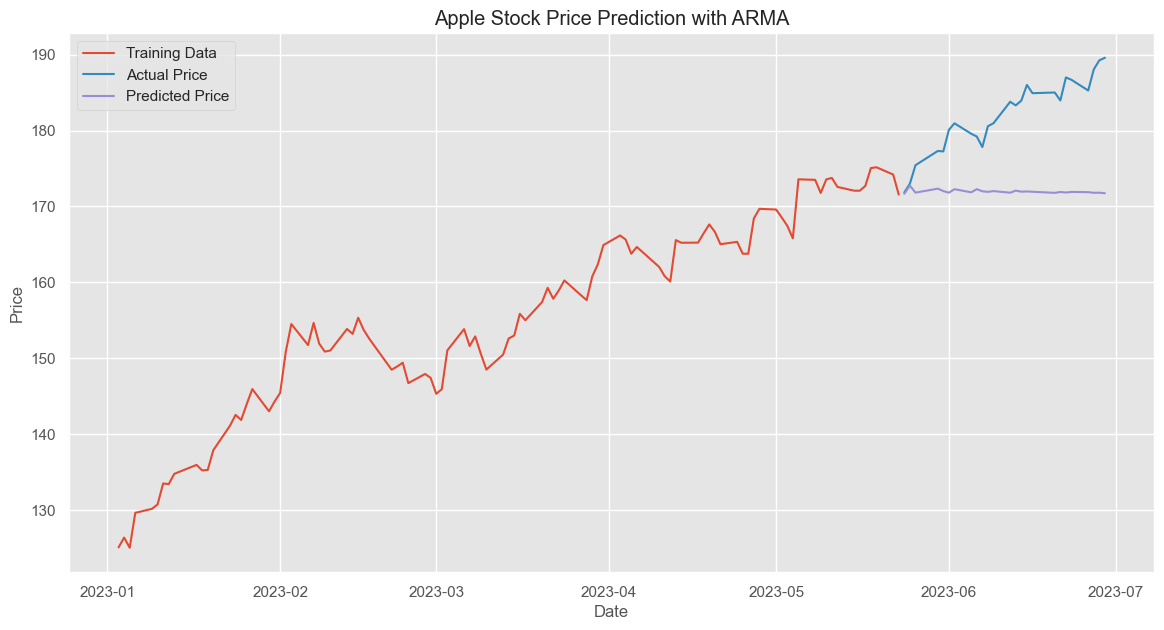

In [5]:
# Download Apple stock data
apple_stock = yf.download('AAPL', start='2023-01-01', end='2023-06-30')

# Split the data into training and test sets
train_size = int(len(apple_stock) * 0.8)
train, test = apple_stock[:train_size], apple_stock[train_size:]

# Fit an ARIMA(2,1,2) model
model = ARIMA(train['Close'], order=(5, 0, 5))  # ARMA(5,0,5) model
model_fit = model.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions.index = test.index

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(test['Close'], predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predicted and actual prices
plt.figure(figsize=(14, 7))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price Prediction with ARMA')
plt.legend()
plt.show()

### Autoregressive Integrated Moving Average

ARMA has a variation model which is the Autoregressive integrated moving average model(ARIMA). The integration term in the ARIMA model represents the differencing of the time series to achieve stationarity. The integrated term is denoted by d, and it indicates the number of times the series has been differenced. In math, the ARIMA model with the integration term can be represented as follows:

$$ \Delta^d Y_t = c + \phi_1 \Delta^d Y_{t-1} + \phi_2 \Delta^d Y_{t-2} + \ldots + \phi_p \Delta^d Y_{t-p} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q} + \varepsilon_t $$

Where, 

1. $Y_t$ is the value of the time series at time t(the value to estimate)
2. $\delta$ represents the differencing operator,
3. $ C $ is a constant value(intercept term for a linear function)
4. $\phi{1}, \phi_{2}, ..., \phi_{p}$ are the autoregressive parameters. 
5. $X_{t-1}, X_{t-2}, ..., X_{t-p}$ are the lagged values of the time series.
6. $\epsilon$ is white noise or error term at time t.
7. $\theta_{1}, \theta_{2}, ..., \theta_{q}$ are the moving average parameters.
8. $p$ is the order of the autoregressive process(AR).
9. $q$ is the order of the moving average process(MA).
10. $d$ is the number of times the series has been differenced.

The key assumption of the Autoregressive Integrated Moving Average (ARIMA) model is that the time series being analyzed is stationary. Stationarity is a critical assumption because ARIMA models are designed to model stationary time series, where the statistical properties such as mean, variance, and autocorrelation structure do not change over time.

Stationarity implies that the series has a constant mean, variance, and autocovariance structure at all time lags. If the series is not stationary, it may exhibit trends, seasonality, or other patterns that violate the assumptions of the ARIMA model. In such cases, the series needs to be transformed to achieve stationarity, usually by differencing or other methods, before fitting an ARIMA model.

[*********************100%%**********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 11.965848579135647


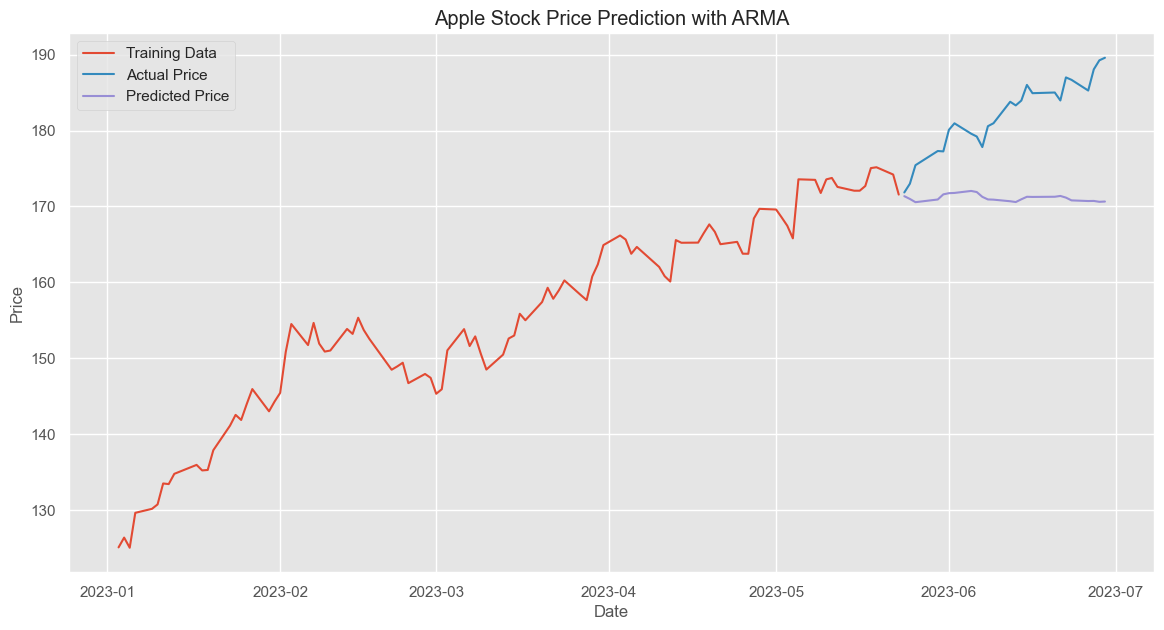

In [6]:
# Download Apple stock data
apple_stock = yf.download('AAPL', start='2023-01-01', end='2023-06-30')

# Split the data into training and test sets
train_size = int(len(apple_stock) * 0.8)
train, test = apple_stock[:train_size], apple_stock[train_size:]

# Fit an ARIMA(2,1,2) model
model = ARIMA(train['Close'], order=(5, 1, 5))  # ARMA(5,1,5) model
model_fit = model.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions.index = test.index

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(test['Close'], predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predicted and actual prices
plt.figure(figsize=(14, 7))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price Prediction with ARMA')
plt.legend()
plt.show()

This doesn't mean AR model is better than ARMA model. Because usually people try to apply the hyperparameter tuning techniques to the problem rather than randomly seletct the model parameters. Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. After the hyperparameter tuning(after the models are optimized), you can make a conclusion. 

In the context of Machine Learning, the most common time series model is Long Short Term Memory. Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture in the Deep Learning family that is well-suited for sequence prediction problems, including time series forecasting. LSTM networks are designed to overcome the vanishing gradient problem that occurs with traditional RNNs, allowing them to capture long-term dependencies in data. However, the implementation of LSTM model requires a Deep Learning framework, Pytorch(by Facebook) and Tensorflow(by Google). The Sklearn library doesn't support the Deep learning framework. I encourage you all to study the LSTM model using Pytorch and TensorFlow. However, we will not cover this topic in this semester. 

Link: https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/

### Note
This Jupyter Notebook focuses on how to implement multiple time series analysis models using stock data. This doesn't make any suggestion towards your investment. The model parameter is selected without any scientific supportive evidence. 

### Reference

https://www.statsmodels.org/dev/examples/index.html#time-series-analysis